## Imports:

In [2]:
#Imports:
import numpy as np
import matplotlib.pyplot as plt

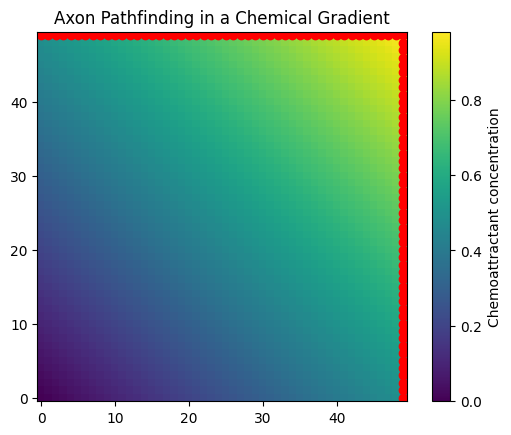

In [17]:
# Axon Pathfinding Simulation

# Step 1: Create a 2D chemical gradient
size = 50
gradient = np.zeros((size, size))

# Simulate a chemoattractant increasing towards the top-right
for i in range(size):
    for j in range(size):
        gradient[i, j] = (i + j) / (2 * size)

# Step 2: Place the axon start position
position = [size - 1, 0]  # bottom-left corner
path = [tuple(position)]

# Step 3: Define how the axon grows
steps = 100
for _ in range(steps):
    x, y = position
    # Look at neighbors (up, right, diagonal)
    neighbors = [(x-1, y), (x, y+1), (x-1, y+1)]
    # Keep only valid positions
    neighbors = [(i, j) for i, j in neighbors if 0 <= i < size and 0 <= j < size]
    if not neighbors:
        break
    # Choose the neighbor with the highest gradient
    next_pos = max(neighbors, key=lambda pos: gradient[pos[0], pos[1]])
    position = list(next_pos)
    path.append(tuple(position))

# Step 4: Plot the gradient and path
plt.imshow(gradient, cmap='viridis')
path = np.array(path)
plt.plot(path[:, 1], path[:, 0], color='red', linewidth=2, marker='o')
plt.title("Axon Pathfinding in a Chemical Gradient")
plt.colorbar(label='Chemoattractant concentration')
plt.gca().invert_yaxis()
plt.show()

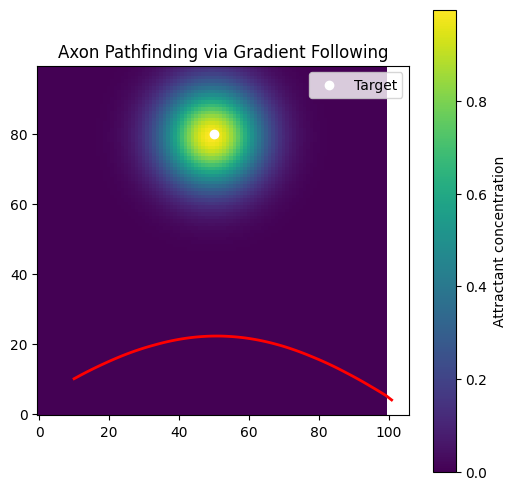

In [18]:
# Step 1: Create a 2D gradient field (Gaussian attractor)
grid_size = 100
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
attractor_x, attractor_y = 0.5, 0.8
sigma = 0.1
field = np.exp(-((x - attractor_x)**2 + (y - attractor_y)**2) / (2 * sigma**2))

# Step 2: Compute the gradient (partial derivatives)
grad_y, grad_x = np.gradient(field)

# Step 3: Simulate axon growth following gradient
trajectory = []
pos = np.array([10, 10], dtype=float)  # starting position in array coordinates
step_size = 1.0
max_steps = 300

for _ in range(max_steps):
    trajectory.append(pos.copy())
    i, j = int(pos[0]), int(pos[1])
    if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
        break
    # Gradient at current position
    dx = grad_x[i, j]
    dy = grad_y[i, j]
    direction = np.array([dx, dy])
    norm = np.linalg.norm(direction)
    if norm == 0:
        break
    # Move in the gradient direction
    pos += step_size * direction / norm

trajectory = np.array(trajectory)

# Step 4: Plot the field and path
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower')
plt.plot(trajectory[:, 1], trajectory[:, 0], color='red', linewidth=2)
plt.title("Axon Pathfinding via Gradient Following")
plt.colorbar(label='Attractant concentration')
plt.scatter(attractor_x * grid_size, attractor_y * grid_size, color='white', label='Target')
plt.legend()
plt.show()


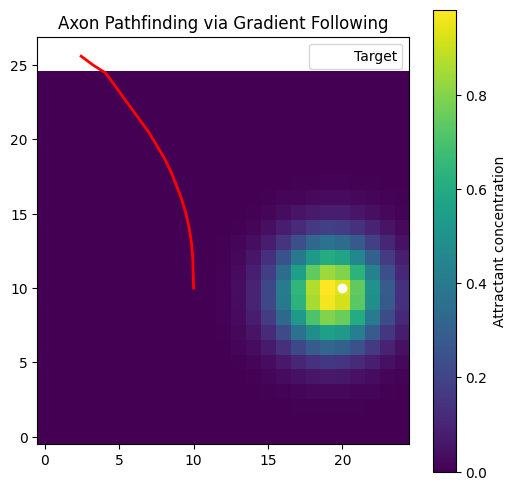

In [19]:
# Step 1: Create a 2D gradient field (Gaussian attractor)
grid_size = 25
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
attractor_x, attractor_y = 0.8, 0.4
sigma = 0.1
field = np.exp(-((x - attractor_x)**2 + (y - attractor_y)**2) / (2 * sigma**2))

# Step 2: Compute the gradient (partial derivatives)
grad_y, grad_x = np.gradient(field)

# Step 3: Simulate axon growth following gradient
trajectory = []
pos = np.array([10, 10], dtype=float)  # starting position in array coordinates
breakpoint()
step_size = 1.0
max_steps = 300

for _ in range(max_steps):
    trajectory.append(pos.copy())
    i, j = int(pos[0]), int(pos[1])
    if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
        break
    # Gradient at current position
    dx = grad_x[i, j]
    dy = grad_y[i, j]
    direction = np.array([dx, dy])
    norm = np.linalg.norm(direction)
    if norm == 0:
        break
    # Move in the gradient direction
    pos += step_size * direction / norm

trajectory = np.array(trajectory)

# Step 4: Plot the field and path
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower')
plt.plot(trajectory[:, 1], trajectory[:, 0], color='red', linewidth=2)
plt.title("Axon Pathfinding via Gradient Following")
plt.colorbar(label='Attractant concentration')
plt.scatter(attractor_x * grid_size, attractor_y * grid_size, color='white', label='Target')
plt.legend()
plt.show()


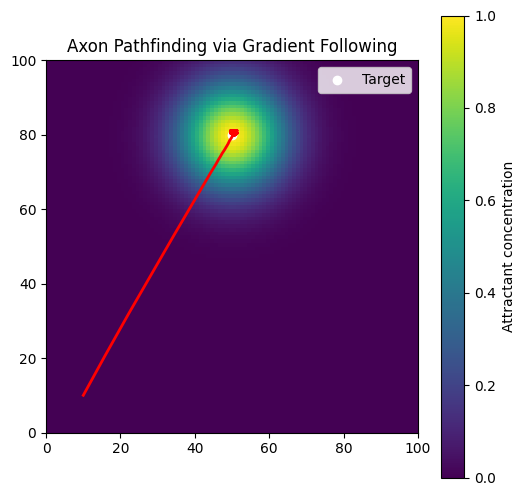

In [20]:
# Modify to use normalised coordinates as GPT suggests:

# Step 1: Create a 2D gradient field (Gaussian attractor)
grid_size = 100
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
attractor_x, attractor_y = 0.5, 0.8
sigma = 0.1
field = np.exp(-((x - attractor_x)**2 + (y - attractor_y)**2) / (2 * sigma**2))

# Step 2: Compute the gradient (partial derivatives)
grad_y, grad_x = np.gradient(field)

# Step 3: Simulate axon growth following gradient
trajectory = []
fpos = np.array([0.1, 0.1], dtype=float)  # normalized coordinates
step_size = 1.0 / grid_size  # match normalized space
max_steps = 300

for _ in range(max_steps):
    trajectory.append(fpos.copy())
    i = int(fpos[1] * (grid_size - 1))  # y (row)
    j = int(fpos[0] * (grid_size - 1))  # x (col)
    if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
        break
    dx = grad_x[i, j]
    dy = grad_y[i, j]
    direction = np.array([dx, dy])
    norm = np.linalg.norm(direction)
    if norm == 0:
        break
    fpos += (step_size * direction / norm)

trajectory = np.array(trajectory)

# Step 4: Plot the field and path
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color='red', linewidth=2)
plt.scatter(attractor_x * grid_size, attractor_y * grid_size, color='white', label='Target')
plt.title("Axon Pathfinding via Gradient Following")
plt.colorbar(label='Attractant concentration')
plt.legend()
plt.show()


Notes on code:



numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')

Return a tuple of coordinate matrices from coordinate vectors.

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0, *, device=None)[source]
Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval [start, stop].



field: [[1.47391992e-05 1.67014878e-05 1.88768120e-05 ... 1.88768120e-05
  1.67014878e-05 1.47391992e-05]
 [1.80159122e-05 2.04144427e-05 2.30733694e-05 ... 2.30733694e-05
  2.04144427e-05 1.80159122e-05]
 [2.19649816e-05 2.48892675e-05 2.81310282e-05 ... 2.81310282e-05
  2.48892675e-05 2.19649816e-05]
 ...
 [2.93315538e-02 3.32365810e-02 3.75655569e-02 ... 3.75655569e-02
  3.32365810e-02 2.93315538e-02]
 [2.79938530e-02 3.17207866e-02 3.58523344e-02 ... 3.58523344e-02
  3.17207866e-02 2.79938530e-02]
 [2.66490973e-02 3.01969983e-02 3.41300767e-02 ... 3.41300767e-02
  3.01969983e-02 2.66490973e-02]]


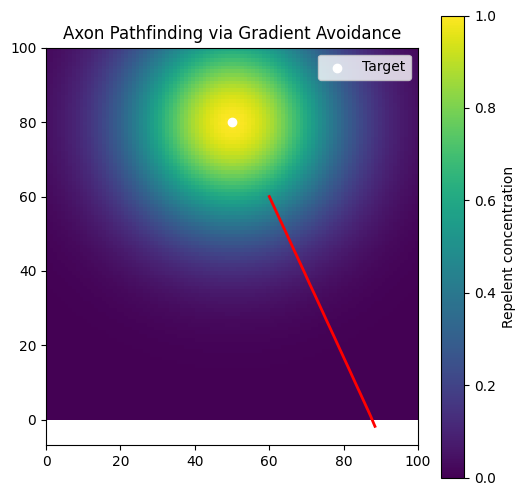

In [21]:
# Step 1: Create a 2D gradient field (Gaussian attractor)
grid_size = 100
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))
attractor_x, attractor_y = 0.5, 0.8
sigma = 0.2
field = np.exp(-((x - attractor_x)**2 + (y - attractor_y)**2) / (2 * sigma**2))
print(f"field: {field}")
# Step 2: Compute the gradient (partial derivatives)
grad_y, grad_x = np.gradient(field)

# Step 3: Simulate axon growth following gradient
trajectory = []
fpos = np.array([0.6, 0.6], dtype=float)  # normalized coordinates
step_size = 1.0 / grid_size  # match normalized space
max_steps = 100

for _ in range(max_steps):
    trajectory.append(fpos.copy())
    i = int(fpos[1] * (grid_size - 1))  # y (row)
    j = int(fpos[0] * (grid_size - 1))  # x (col)
    if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
        break
    dx = grad_x[i, j]
    dy = grad_y[i, j]
    direction = np.array([dx, dy])
    norm = np.linalg.norm(direction)
    if norm == 0:
        break
    fpos -= (step_size * direction / norm) #Change += to -= to make it grow away

trajectory = np.array(trajectory)

# Step 4: Plot the field and path
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
#plot neuron trajectory
plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color='red', linewidth=2)

plt.scatter(attractor_x * grid_size, attractor_y * grid_size, color='white', label='Target')
plt.title("Axon Pathfinding via Gradient Avoidance")
plt.colorbar(label='Repelent concentration')
plt.legend()
plt.show()


## fjfjf
Ok so we made it into a repellent function can we make it into separate functions so we can join multiple fields and multiple neurons?

C:\Users\sdgg\AppData\Local\Temp\ipykernel_22396\446840619.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


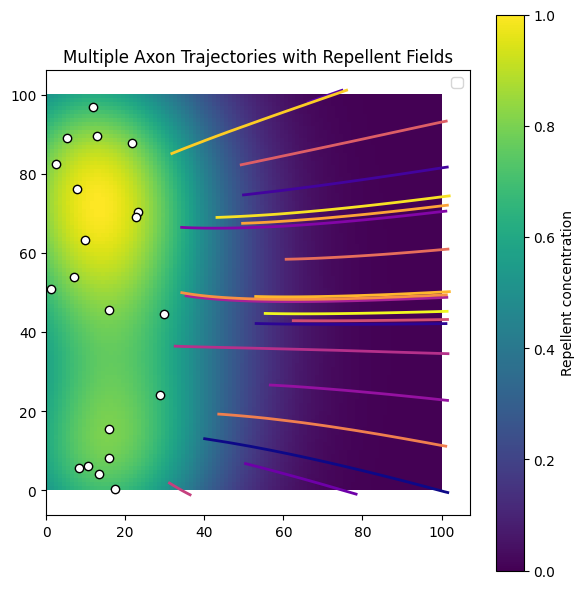

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
grid_size = 100
num_neurons = 20
num_repellents = 20
sigma = 0.2
step_size = 1.0 / grid_size
max_steps = 100

# Grid
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# Define multiple repellent centers (randomized or fixed)
repellent_positions = [
    (np.random.uniform(0.0, 0.3), np.random.uniform(0.0, 1)) for _ in range(num_repellents)
]
field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

# Compute gradient of the combined field
grad_y, grad_x = np.gradient(field)

# Define multiple neuron starting positions
starting_positions = [
    (np.random.uniform(0.3, 0.7), np.random.uniform(0, 1)) for _ in range(num_neurons)
]

# Plot setup
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# Simulate and plot each neuron
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        dx = grad_x[i, j]
        dy = grad_y[i, j]
        direction = np.array([dx, dy])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= (step_size * direction / norm)

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# Plot repellent centers
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black')

plt.title("Multiple Axon Trajectories with Repellent Fields")
plt.colorbar(label='Repellent concentration')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\sdgg\AppData\Local\Temp\ipykernel_22396\642474357.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


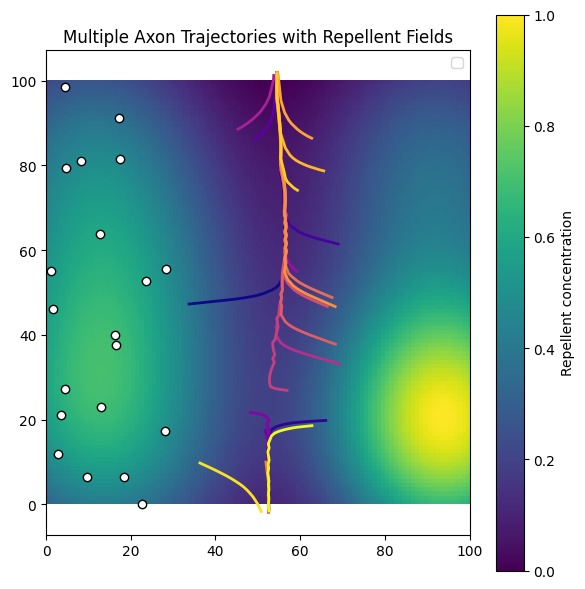

In [23]:
#Edited for adding muller_glia

# Parameters
grid_size = 100
num_neurons = 20
num_repellents = 20
num_muller_repellents = 20
sigma = 0.2
step_size = 1.0 / grid_size
max_steps = 100

# Grid
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# Define multiple repellent centers (randomized or fixed)
repellent_positions = [
    (np.random.uniform(0.0, 0.3), np.random.uniform(0.0, 1)) for _ in range(num_repellents)
]
field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##ADD MULLER GLIA
# Define multiple repellent centers (randomized or fixed)
repellent_positions_muller = [
    (np.random.uniform(0.9, 1), np.random.uniform(0.0, 1)) for _ in range(num_muller_repellents)
]
#field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions_muller:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##END ADD MULLER GLIA

# Compute gradient of the combined field
grad_y, grad_x = np.gradient(field)

# Define multiple neuron starting positions
starting_positions = [
    (np.random.uniform(0.3, 0.7), np.random.uniform(0, 1)) for _ in range(num_neurons)
]

# Plot setup
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# Simulate and plot each neuron
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        dx = grad_x[i, j]
        dy = grad_y[i, j]
        direction = np.array([dx, dy])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= (step_size * direction / norm)

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# Plot repellent centers
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black')

plt.title("Multiple Axon Trajectories with Repellent Fields")
plt.colorbar(label='Repellent concentration')
plt.legend()
plt.tight_layout()
plt.show()

Okay let's flip the model 90 degrees so it looks like the image in the intro

C:\Users\sdgg\AppData\Local\Temp\ipykernel_22396\3334088725.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


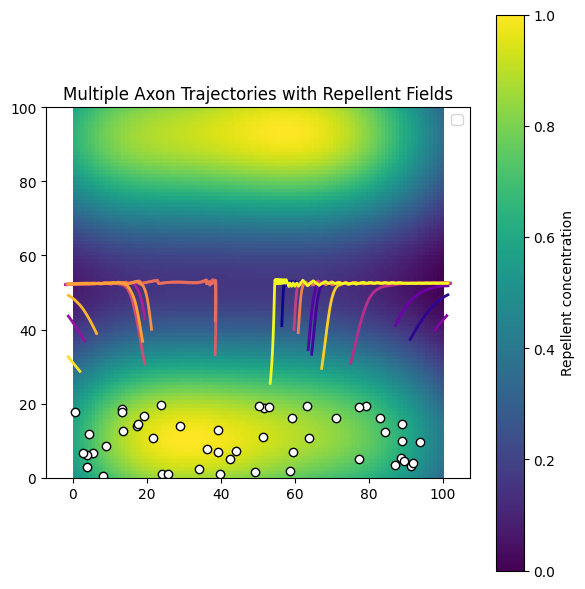

In [24]:
#Fliped

# Parameters
grid_size = 100
num_neurons = 20
num_repellents = 50
num_muller_repellents = 50
sigma = 0.2
step_size = 1.0 / grid_size
max_steps = 100

# Grid
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# Define multiple repellent centers (randomized or fixed)
repellent_positions = [
    (np.random.uniform(0.0, 1), np.random.uniform(0.0, 0.2)) for _ in range(num_repellents)
]
field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##ADD MULLER GLIA
# Define multiple repellent centers (randomized or fixed)
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller_repellents)
]
#field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions_muller:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##END ADD MULLER GLIA

# Compute gradient of the combined field
grad_y, grad_x = np.gradient(field)

# Define multiple neuron starting positions
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.45)) for _ in range(num_neurons)
]

# Plot setup
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# Simulate and plot each neuron
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        dx = grad_x[i, j]
        dy = grad_y[i, j]
        direction = np.array([dx, dy])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= (step_size * direction / norm)

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# Plot repellent centers
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black')

plt.title("Multiple Axon Trajectories with Repellent Fields")
plt.colorbar(label='Repellent concentration')
plt.legend()
plt.tight_layout()
plt.show()

Seems there is some sort of edge effect:
Can we plot the distribution of cells?

Run multiple times?

In [25]:
print(np.array(repellent_positions))


[[0.0538123  0.06572613]
 [0.79222522 0.19449721]
 [0.91408974 0.03015306]
 [0.34054861 0.02441409]
 [0.23786217 0.19639843]
 [0.7722043  0.04952456]
 [0.51759047 0.18782104]
 [0.58670128 0.01858216]
 [0.91905558 0.0405393 ]
 [0.03718078 0.060052  ]
 [0.88652333 0.05185822]
 [0.13383181 0.18527773]
 [0.71137418 0.16148938]
 [0.09095108 0.08657697]
 [0.59377431 0.06933113]
 [0.13683652 0.12580135]
 [0.00479726 0.17814016]
 [0.19305565 0.16562744]
 [0.84312779 0.12205877]
 [0.89350334 0.04581795]
 [0.03804025 0.02870022]
 [0.3924173  0.0687877 ]
 [0.39878941 0.01032889]
 [0.23983028 0.01009519]
 [0.63162316 0.19395692]
 [0.39303388 0.12920102]
 [0.42457134 0.05029184]
 [0.04314872 0.11886286]
 [0.52916216 0.19080545]
 [0.51291767 0.10878037]
 [0.28990295 0.1386234 ]
 [0.441164   0.07322334]
 [0.13428054 0.17672821]
 [0.87038204 0.03441727]
 [0.21563993 0.10777296]
 [0.88949349 0.14365435]
 [0.77368699 0.19156402]
 [0.36389764 0.07752491]
 [0.63723214 0.10573024]
 [0.93741728 0.09654396]


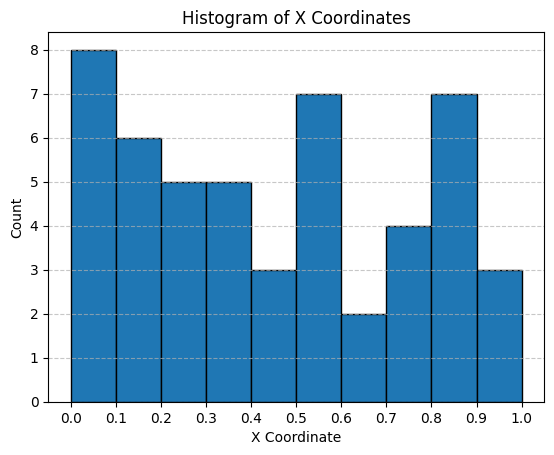

In [26]:
# Extract x coordinates
x_coords = [x for x, y in repellent_positions]

# Create histogram with bins of size 0.1 between 0 and 1
bins = np.arange(0, 1.1, 0.1)

plt.hist(x_coords, bins=bins, edgecolor='black')
plt.xlabel('X Coordinate')
plt.ylabel('Count')
plt.title('Histogram of X Coordinates')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

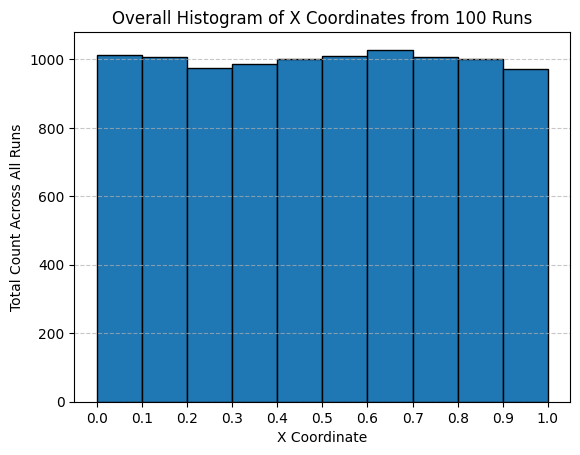

In [27]:
num_repellents = 100
num_runs = 100
all_x_coords = []

for _ in range(num_runs):
    repellent_positions = [
        (np.random.uniform(0.0, 1), np.random.uniform(0.0, 0.2))
        for _ in range(num_repellents)
    ]
    x_coords = [x for x, y in repellent_positions]
    all_x_coords.extend(x_coords)  # Add to overall list

# Create histogram
bins = np.arange(0, 1.1, 0.1)

plt.hist(all_x_coords, bins=bins, edgecolor='black')
plt.xlabel('X Coordinate')
plt.ylabel('Total Count Across All Runs')
plt.title(f'Overall Histogram of X Coordinates from {num_runs} Runs')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Split the repellents in 2 to make space for optic disc

[(0.19903287936660932, 0.062384749958703446), (0.7733974359521057, 0.10841932637019419), (0.8091330955938492, 0.15496087662772584), (0.8914629377268396, 0.18942797110359152), (0.8948222173152811, 0.15571640360053185), (0.08207617958962299, 0.13050184206000345), (0.8971686792450022, 0.1620983621017869), (0.8589486856157916, 0.04404042413732567), (0.10532010259754632, 0.05038687103149329), (0.7746955480892191, 0.1023593981828837), (0.9233471845569035, 0.10751653321954911), (0.8525288095486157, 0.11247080367048495), (0.3572613302529262, 0.078167511694979), (0.7102848910989213, 0.1106131752122701), (0.20752485332642331, 0.0036091400633545103), (0.16186132962502642, 0.07307223728649262), (0.705892085671987, 0.15095995535512474), (0.9870169637783823, 0.14847793208874976), (0.8612346830093651, 0.027131026580345163), (0.30339114609539586, 0.13868118861127063), (0.3260224837021157, 0.0847490136437315), (0.9019725463303122, 0.09990800796393917), (0.37486139879345654, 0.012637816374252632), (0.33

C:\Users\sdgg\AppData\Local\Temp\ipykernel_22396\3116037408.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


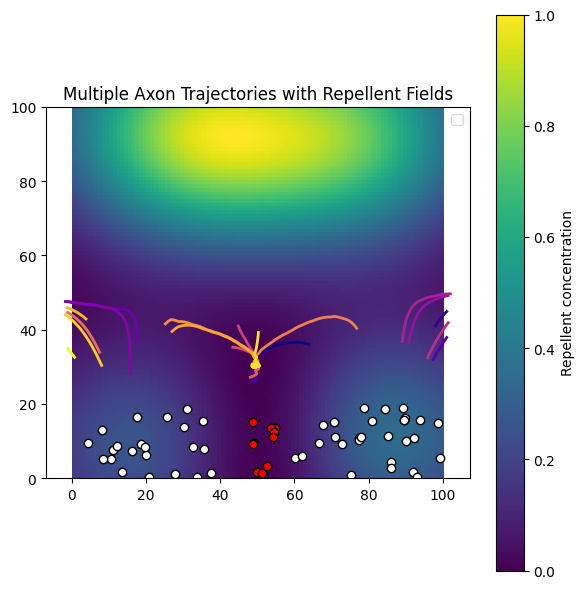

In [28]:
#Fliped

# Parameters
grid_size = 100
num_neurons = 20
num_repellents = 50
num_muller_repellents = 100
num_attractors = 10
sigma = 0.2
step_size = 1.0 / grid_size
max_steps = 100

# Grid
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# Define multiple repellent centers (randomized or fixed)
repellent_positions =[
(np.random.uniform(0.0, 0.4) if np.random.rand() < 0.5 else np.random.uniform(0.6, 1.0), np.random.uniform(0.0, 0.2)) for _ in range(num_repellents)
]

print(repellent_positions)
field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##ADD MULLER GLIA
# Define multiple repellent centers (randomized or fixed)
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller_repellents)
]
#field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions_muller:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##END ADD MULLER GLIA

## Modify model to include attraction towards optic disc
# Define attractor possitions
attractor_positions = [
    (np.random.uniform(0.45, 0.55), np.random.uniform(0.0, 0.2))
    for _ in range(num_attractors)
]

# Combine multiple Gaussian attractor fields (negative to attract)
attractor_strength = 1.5  # Adjust the strength as needed
for ax, ay in attractor_positions:
    field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma**2))

# Compute gradient of the combined field
grad_y, grad_x = np.gradient(field)

# Define multiple neuron starting positions
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.45)) for _ in range(num_neurons)
]




# Plot setup
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# Simulate and plot each neuron
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        dx = grad_x[i, j]
        dy = grad_y[i, j]
        direction = np.array([dx, dy])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= (step_size * direction / norm)

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# Plot repellent centers
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black')

# Plot attractor centers
for ax, ay in attractor_positions:
    plt.scatter(ax * grid_size, ay * grid_size, color='red', edgecolor='black')

plt.title("Multiple Axon Trajectories with Repellent Fields")
plt.colorbar(label='Repellent concentration')
plt.legend()
plt.tight_layout()
plt.show()

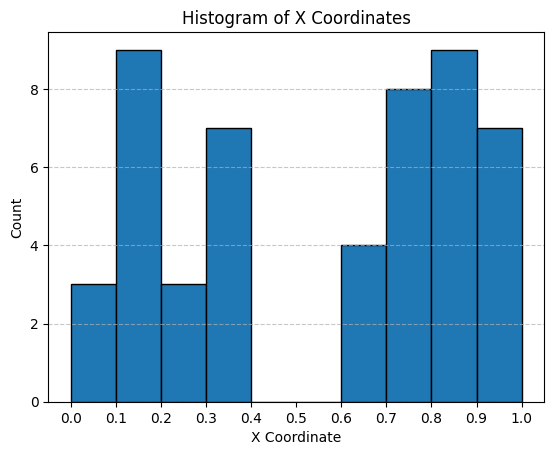

In [29]:
# Extract x coordinates
x_coords = [x for x, y in repellent_positions]

# Create histogram with bins of size 0.1 between 0 and 1
bins = np.arange(0, 1.1, 0.1)

plt.hist(x_coords, bins=bins, edgecolor='black')
plt.xlabel('X Coordinate')
plt.ylabel('Count')
plt.title('Histogram of X Coordinates')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[(0.43425629452474707, 0.04051608238064888), (0.9518682372655087, 0.15867549062350375), (0.13838666906096306, 0.1299495751669956), (0.15782398576465972, 0.040737260989332905), (0.18398719064032762, 0.07654435747733164), (0.3538861928358526, 0.03208389624391433), (0.8832055606613889, 0.18243043394172287), (0.853126216200474, 0.16962773947960563), (0.16296020968417638, 0.07150846625032652), (0.3323501279250857, 0.01860409202567317), (0.32659976541959795, 0.13604420856145308), (0.09652783076904169, 0.16869399172330915), (0.11029017725520908, 0.07415587222539255), (0.7840174811091682, 0.1235168815434427), (0.9163799228878418, 0.18278581014705264), (0.7491636574362022, 0.06895465405758221), (0.8843081535320091, 0.1650968900318174), (0.8597313316686024, 0.08025913330839303), (0.0003738032127559021, 0.19554240408206192), (0.9854859818969948, 0.1803753845476073), (0.14255019508977712, 0.12816020391021926), (0.40060354332809034, 0.13058443674801054), (0.7691682410042167, 0.014730691541339902), 

C:\Users\sdgg\AppData\Local\Temp\ipykernel_22396\1006103004.py:101: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


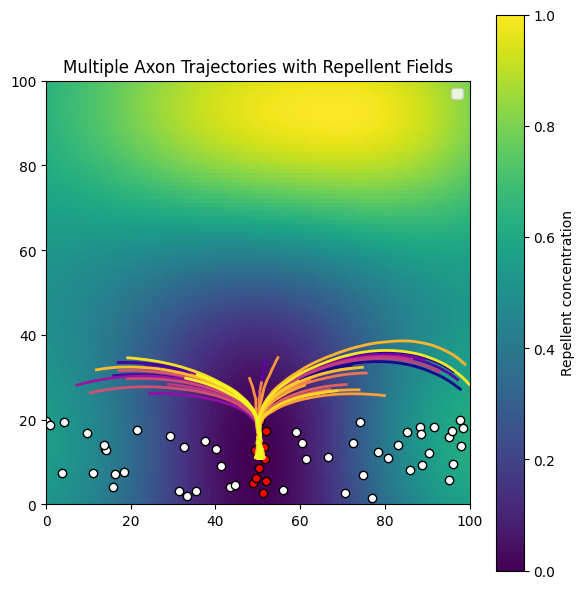

In [30]:
# Fix attractors

# Parameters
grid_size = 100
num_neurons = 50
num_repellents = 50
num_muller_repellents = 50
num_attractors = 10
sigma = 0.2
attractor_sigma = 0.3
step_size = 1.0 / grid_size
max_steps = 100

# Grid
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# Define multiple repellent centers (randomized or fixed)
repellent_positions =[
(np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), np.random.uniform(0.0, 0.2)) for _ in range(num_repellents)
]

print(repellent_positions)
field = np.zeros_like(x)

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##ADD MULLER GLIA
# Define multiple repellent centers (randomized or fixed)
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller_repellents)
]

# Combine multiple Gaussian repellent fields
for rx, ry in repellent_positions_muller:
    field += np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma**2))

##END ADD MULLER GLIA

## Modify model to include attraction towards optic disc
# Define attractor possitions
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2))
    for _ in range(num_attractors)
]

# Combine multiple Gaussian attractor fields (negative to attract)
attractor_strength = 5  # Adjust the strength as needed
for ax, ay in attractor_positions:
    field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * attractor_sigma**2))

# Compute gradient of the combined field
grad_y, grad_x = np.gradient(field)

# Define multiple neuron starting positions
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.35)) for _ in range(num_neurons)
]




# Plot setup
plt.figure(figsize=(6, 6))
plt.imshow(field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# Simulate and plot each neuron
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        dx = grad_x[i, j]
        dy = grad_y[i, j]
        direction = np.array([dx, dy])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= (step_size * direction / norm)

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# Plot repellent centers
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black')

# Plot attractor centers
for ax, ay in attractor_positions:
    plt.scatter(ax * grid_size, ay * grid_size, color='red', edgecolor='black')

plt.title("Multiple Axon Trajectories with Repellent Fields")
plt.colorbar(label='Repellent concentration')
plt.legend()
plt.tight_layout()
plt.show()

## Current 
Edit code for readability:

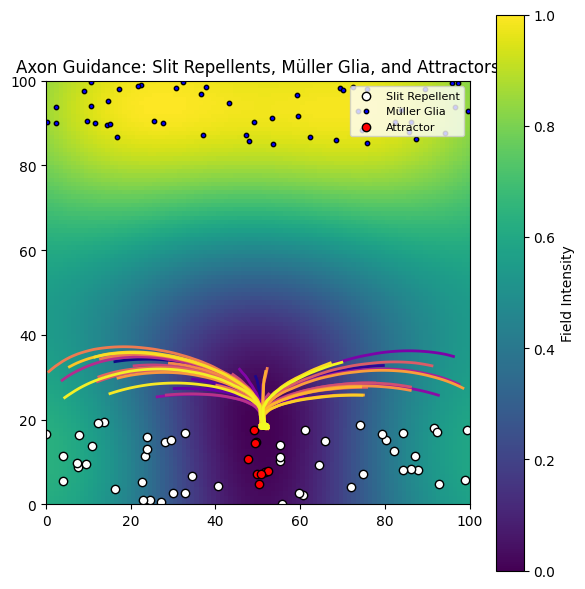

In [31]:
# Parameters
grid_size = 100
num_neurons = 50
num_repellents = 50
num_muller_repellents = 50
num_attractors = 10

sigma_repellent = 0.2
sigma_muller = 0.2
sigma_attractor = 0.3

repellent_strength = 1.0
muller_strength = 1.0
attractor_strength = 5.0

step_size = 1.0 / grid_size
max_steps = 100

# Grid setup
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# --- Generate field components separately ---

# 1. Slit-like repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.0, 0.2)) 
    for _ in range(num_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += repellent_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_repellent**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field

# --- Compute gradient ---
grad_y, grad_x = np.gradient(total_field)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.35)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(6, 6))
plt.imshow(total_field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= step_size * direction / norm

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_size, ry * grid_size, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_size, ay * grid_size, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


## Attempt to make an interractive plot - failed for now ipywidgets missing

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
from matplotlib.animation import FuncAnimation

# Enable interactive backend in Jupyter
%matplotlib notebook

def simulate_and_animate(
    num_neurons=30, num_repellents=30, num_muller=30, num_attractors=10,
    repellent_strength=1.0, muller_strength=1.0, attractor_strength=5.0
):
    # Setup
    grid_size = 100
    sigma_repellent = 0.2
    sigma_muller = 0.2
    sigma_attractor = 0.3
    step_size = 1.0 / grid_size
    max_steps = 80

    x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

    # Repellent field
    repellent_positions = [
        (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
         np.random.uniform(0.0, 0.2)) for _ in range(num_repellents)
    ]
    repellent_field = np.zeros_like(x)
    for rx, ry in repellent_positions:
        repellent_field += repellent_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_repellent**2))

    # Müller field
    muller_positions = [(np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller)]
    muller_field = np.zeros_like(x)
    for rx, ry in muller_positions:
        muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

    # Attractor field
    attractor_positions = [(np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)]
    attractor_field = np.zeros_like(x)
    for ax, ay in attractor_positions:
        attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

    # Combined field and gradient
    total_field = repellent_field + muller_field + attractor_field
    grad_y, grad_x = np.gradient(total_field)

    # Starting neuron positions
    starting_positions = [
        (np.random.uniform(0, 1), np.random.uniform(0.25, 0.35)) for _ in range(num_neurons)
    ]

    trajectories = [[] for _ in range(num_neurons)]
    positions = [np.array(pos, dtype=float) for pos in starting_positions]

    # Set up plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title("Axon Growth Simulation (Interactive)")
    im = ax.imshow(total_field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
    scat = ax.scatter([], [], color='red', s=5)
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)

    colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

    lines = [ax.plot([], [], color=colors[i])[0] for i in range(num_neurons)]

    def init():
        for line in lines:
            line.set_data([], [])
        scat.set_offsets([])
        return lines + [scat]

    def update(frame):
        all_positions = []
        for i, pos in enumerate(positions):
            if pos is None:
                continue
            j = int(pos[0] * (grid_size - 1))
            k = int(pos[1] * (grid_size - 1))
            if j < 0 or j >= grid_size or k < 0 or k >= grid_size:
                positions[i] = None
                continue
            direction = np.array([grad_x[k, j], grad_y[k, j]])
            norm = np.linalg.norm(direction)
            if norm == 0:
                positions[i] = None
                continue
            pos -= step_size * direction / norm
            trajectories[i].append(pos.copy())
            all_positions.append([pos[0] * grid_size, pos[1] * grid_size])
            lines[i].set_data(
                [p[0] * grid_size for p in trajectories[i]],
                [p[1] * grid_size for p in trajectories[i]]
            )

        scat.set_offsets(all_positions)
        return lines + [scat]

    ani = FuncAnimation(fig, update, frames=max_steps, init_func=init, blit=True, interval=150, repeat=False)
    plt.show()

# Interactive sliders
interact(
    simulate_and_animate,
    num_neurons=IntSlider(10, 5, 100, 5),
    num_repellents=IntSlider(20, 5, 100, 5),
    num_muller=IntSlider(20, 5, 100, 5),
    num_attractors=IntSlider(5, 1, 20, 1),
    repellent_strength=FloatSlider(1.0, 0.1, 5.0, 0.1),
    muller_strength=FloatSlider(1.0, 0.1, 5.0, 0.1),
    attractor_strength=FloatSlider(5.0, 0.5, 10.0, 0.5)
)


ModuleNotFoundError: No module named 'ipywidgets'

## Wandering neurons noise

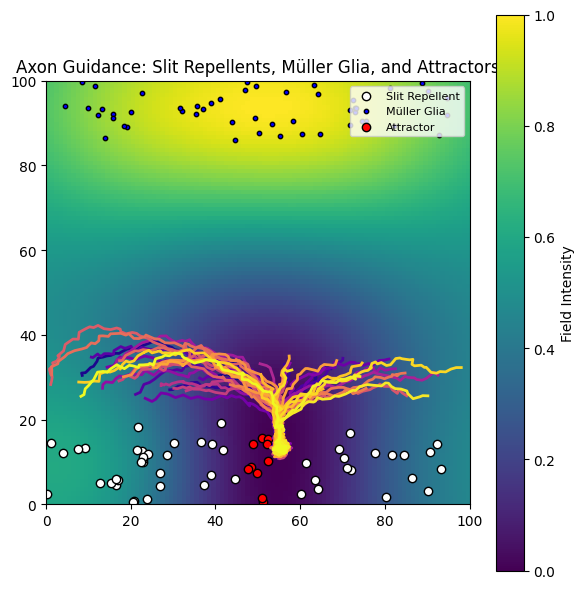

In [ ]:
# Wandering neurons noise:

# Parameters
grid_size = 100
num_neurons = 50
num_repellents = 50
num_muller_repellents = 50
num_attractors = 10

sigma_repellent = 0.2
sigma_muller = 0.2
sigma_attractor = 0.3

repellent_strength = 1.0
muller_strength = 1.0
attractor_strength = 5.0

step_size = 1.0 / grid_size
max_steps = 100

# Grid setup
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# --- Generate field components separately ---

# 1. Slit-like repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.0, 0.2)) 
    for _ in range(num_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += repellent_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_repellent**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field

# --- Compute gradient ---
grad_y, grad_x = np.gradient(total_field)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.35)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(6, 6))
plt.imshow(total_field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        direction /= norm

        # Add random directional noise
        noise_strength = 0.005  # Adjust this between 0.1 and 0.5 to explore effects
        noise = noise_strength * np.random.randn(2)  # <<< Add noise to both x and y
        step = -step_size * direction + noise  # <<< Combine gradient and noise
        fpos += step  # <<< Use noisy step


    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_size, ry * grid_size, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_size, ay * grid_size, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


## Total field noise added

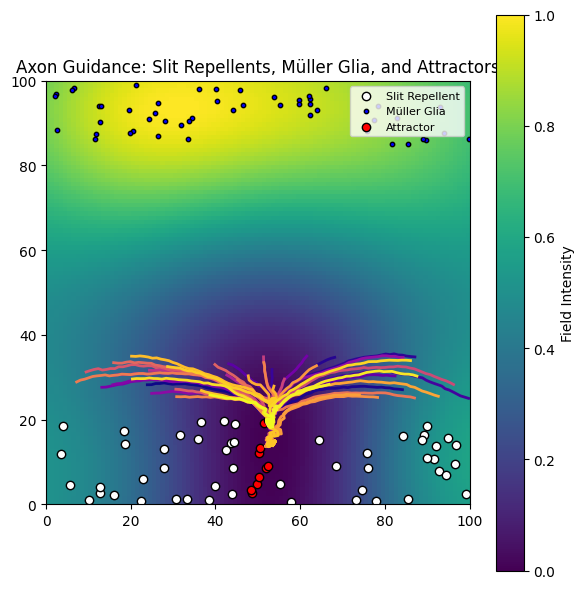

In [ ]:
# Parameters
grid_size = 100
num_neurons = 50
num_repellents = 50
num_muller_repellents = 50
num_attractors = 10

sigma_repellent = 0.2
sigma_muller = 0.2
sigma_attractor = 0.3

repellent_strength = 1.0
muller_strength = 1.0
attractor_strength = 5.0

step_size = 1.0 / grid_size
max_steps = 100

# Grid setup
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# --- Generate field components separately ---

# 1. Slit-like repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.0, 0.2)) 
    for _ in range(num_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += repellent_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_repellent**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field

# --- Add random noise to the total field ---
noise_amplitude = 0.1  # Adjust between 0.1 (subtle) to 1.0+ (very noisy)
noise = noise_amplitude * np.random.randn(*total_field.shape)
noisy_field = total_field + noise

# --- Compute gradient ---
#grad_y, grad_x = np.gradient(total_field)
grad_y, grad_x = np.gradient(noisy_field)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.35)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(6, 6))
plt.imshow(total_field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= step_size * direction / norm

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_size, ry * grid_size, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_size, ay * grid_size, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
# Parameters
grid_size = 100
num_neurons = 50
num_repellents = 50
num_muller_repellents = 50
num_attractors = 10

sigma_repellent = 0.2
sigma_muller = 0.2
sigma_attractor = 0.3

repellent_strength = 1.0
muller_strength = 1.0
attractor_strength = 5.0

step_size = 1.0 / grid_size
max_steps = 100

# Grid setup
x, y = np.meshgrid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size))

# --- Generate field components separately ---

# 1. Slit-like repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.0, 0.2)) 
    for _ in range(num_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += repellent_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_repellent**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.85, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field

# --- Add random noise to the total field ---
noise_amplitude = 0.1  # Adjust between 0.1 (subtle) to 1.0+ (very noisy)
noise = noise_amplitude * np.random.randn(*total_field.shape)
noisy_field = total_field + noise

# --- Compute gradient ---
#grad_y, grad_x = np.gradient(total_field)
grad_y, grad_x = np.gradient(noisy_field)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.35)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(6, 6))
plt.imshow(total_field, cmap='viridis', origin='lower', extent=[0, grid_size, 0, grid_size])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_size - 1))
        j = int(fpos[0] * (grid_size - 1))
        if i < 0 or i >= grid_size or j < 0 or j >= grid_size:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= step_size * direction / norm

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_size, trajectory[:, 1] * grid_size, color=colors[idx], linewidth=2)

# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_size, ry * grid_size, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_size, ry * grid_size, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_size, ay * grid_size, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


## Rectangular space (not square)

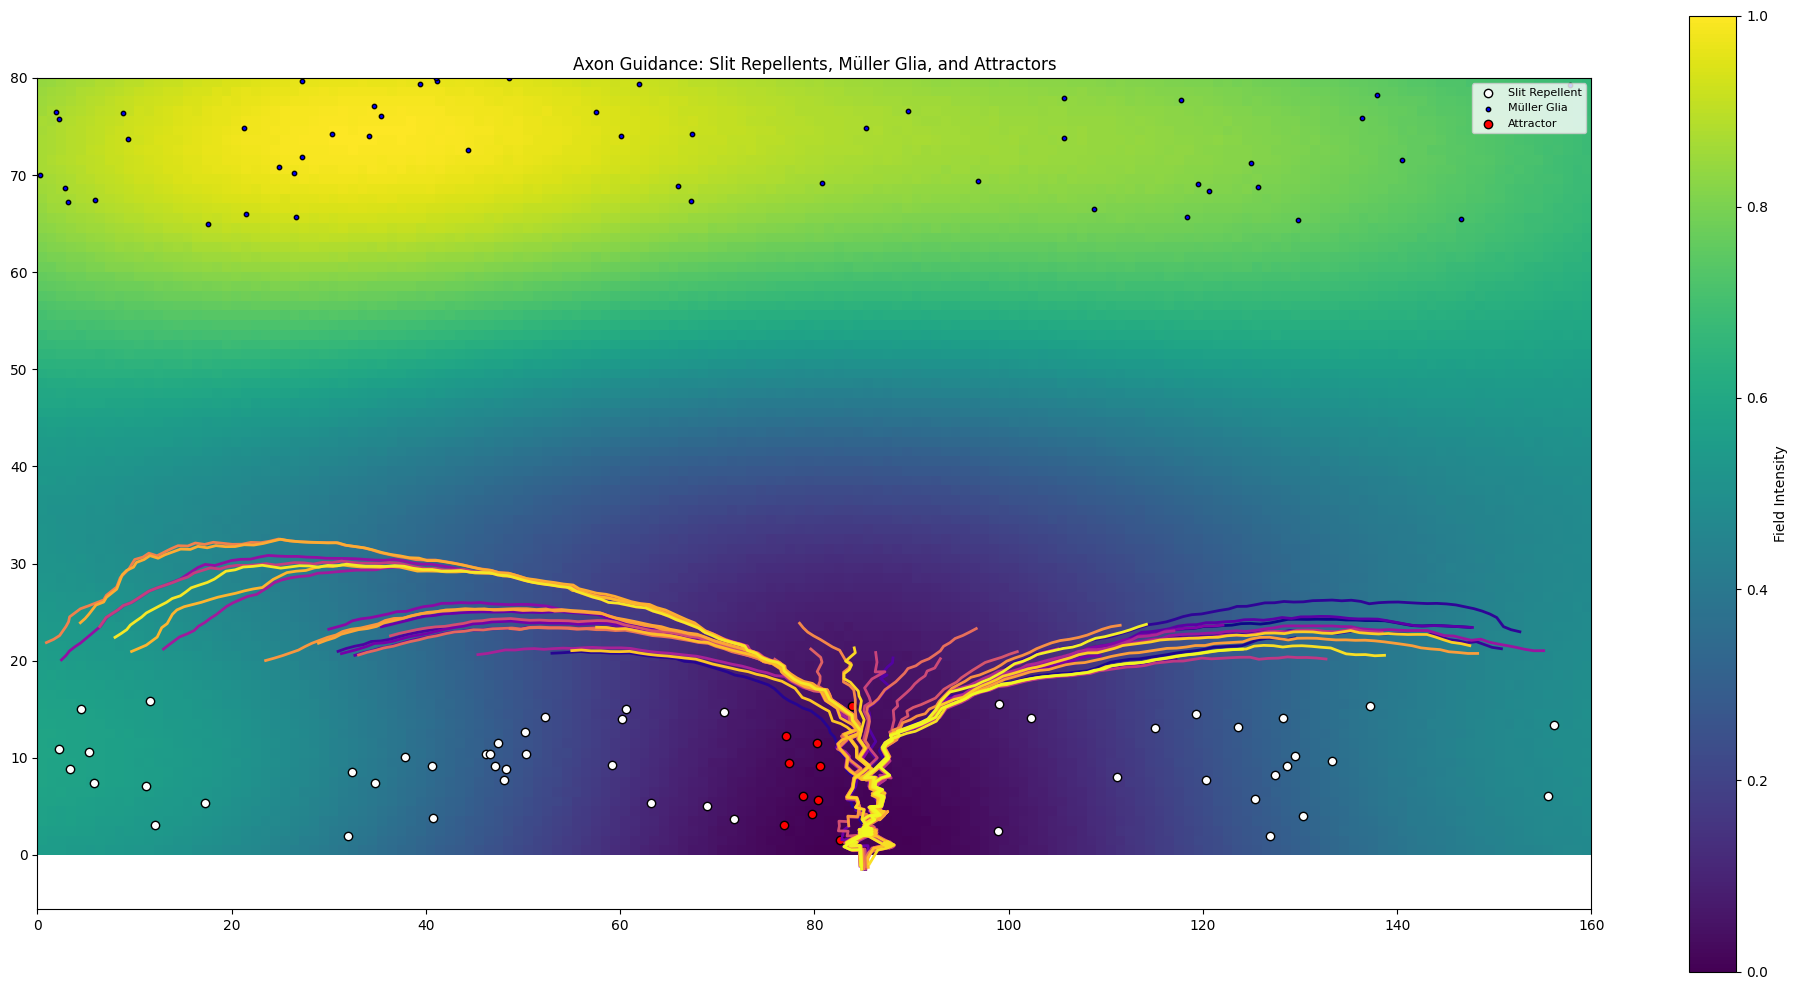

In [ ]:
# Parameters
#grid_size = 100
grid_width = 160   # number of x-steps
grid_height = 80   # number of y-steps
num_neurons = 50
num_repellents = 50
num_muller_repellents = 50
num_attractors = 10

sigma_repellent = 0.2
sigma_muller = 0.2
sigma_attractor = 0.3

repellent_strength = 1.0
muller_strength = 1.0
attractor_strength = 5.0

#step_size = 1.0 / grid_size
step_size = 1.0 / max(grid_width, grid_height)
max_steps = 100

# Grid setup
x = np.linspace(0, 1, grid_width)
y = np.linspace(0, 1, grid_height)
x, y = np.meshgrid(x, y)

# --- Generate field components separately ---

# 1. Slit-like repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.0, 0.2)) 
    for _ in range(num_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += repellent_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_repellent**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.8, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field

# --- Add random noise to the total field ---
noise_amplitude = 0.1  # Adjust between 0.1 (subtle) to 1.0+ (very noisy)
noise = noise_amplitude * np.random.randn(*total_field.shape)
noisy_field = total_field + noise

# --- Compute gradient ---
#grad_y, grad_x = np.gradient(total_field)
grad_y, grad_x = np.gradient(noisy_field)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.3)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(20, 10))
plt.imshow(noisy_field, cmap='viridis', origin='lower', extent=[0, grid_width, 0, grid_height])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---
for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_height - 1))
        j = int(fpos[0] * (grid_width - 1))
        if i < 0 or i >= grid_height or j < 0 or j >= grid_width:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            break
        fpos -= step_size * direction / norm

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_width, trajectory[:, 1] * grid_height, color=colors[idx], linewidth=2)

# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_width, ry * grid_height, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_width, ry * grid_height, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_width, ay * grid_height, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


# Neuron not stopping if field slope is 0

In [ ]:
# Parameters
grid_width = 160   # number of x-steps
grid_height = 80   # number of y-steps
num_neurons = 50
num_amacrine_repellents = 50
num_muller_repellents = 50
num_attractors = 10

sigma_amacrine = 0.2
sigma_muller = 0.2
sigma_attractor = 0.3

amacrine_strength = 1.0
muller_strength = 1.0
attractor_strength = 5.0

#step_size = 1.0 / grid_size
step_size = 1.0 / max(grid_width, grid_height)
max_steps = 100

# Grid setup
x = np.linspace(0, 1, grid_width)
y = np.linspace(0, 1, grid_height)
x, y = np.meshgrid(x, y)

# --- Generate field components separately ---

# 1. Amacrine repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.0, 0.2)) 
    for _ in range(num_amacrine_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += amacrine_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_amacrine**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.8, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field

# --- Add random noise to the total field --- temp removed 
# noise_amplitude = 0.1  # Adjust between 0.1 (subtle) to 1.0+ (very noisy)
# noise = noise_amplitude * np.random.randn(*total_field.shape)
# noisy_field = total_field + noise

noisy_field = total_field

# --- Compute gradient ---
#grad_y, grad_x = np.gradient(total_field)
grad_y, grad_x = np.gradient(noisy_field)
print(grad_y)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.3)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(20, 10))
plt.imshow(noisy_field, cmap='viridis', origin='lower', extent=[0, grid_width, 0, grid_height])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---

random_steps = 0
max_random_steps = 10  # or some other number

for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_height - 1))
        j = int(fpos[0] * (grid_width - 1))
        if i < 0 or i >= grid_height or j < 0 or j >= grid_width:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            random_steps += 1
            if random_steps > max_random_steps:
                break
            random_direction = np.random.randn(2)
            random_direction /= np.linalg.norm(random_direction)
            fpos += step_size * random_direction
        else:
            fpos -= step_size * direction / norm
            random_steps = 0  # reset when gradient is found

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_width, trajectory[:, 1] * grid_height, color=colors[idx], linewidth=2)

# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_width, ry * grid_height, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_width, ry * grid_height, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_width, ay * grid_height, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()



SyntaxError: invalid syntax (1948051726.py, line 126)

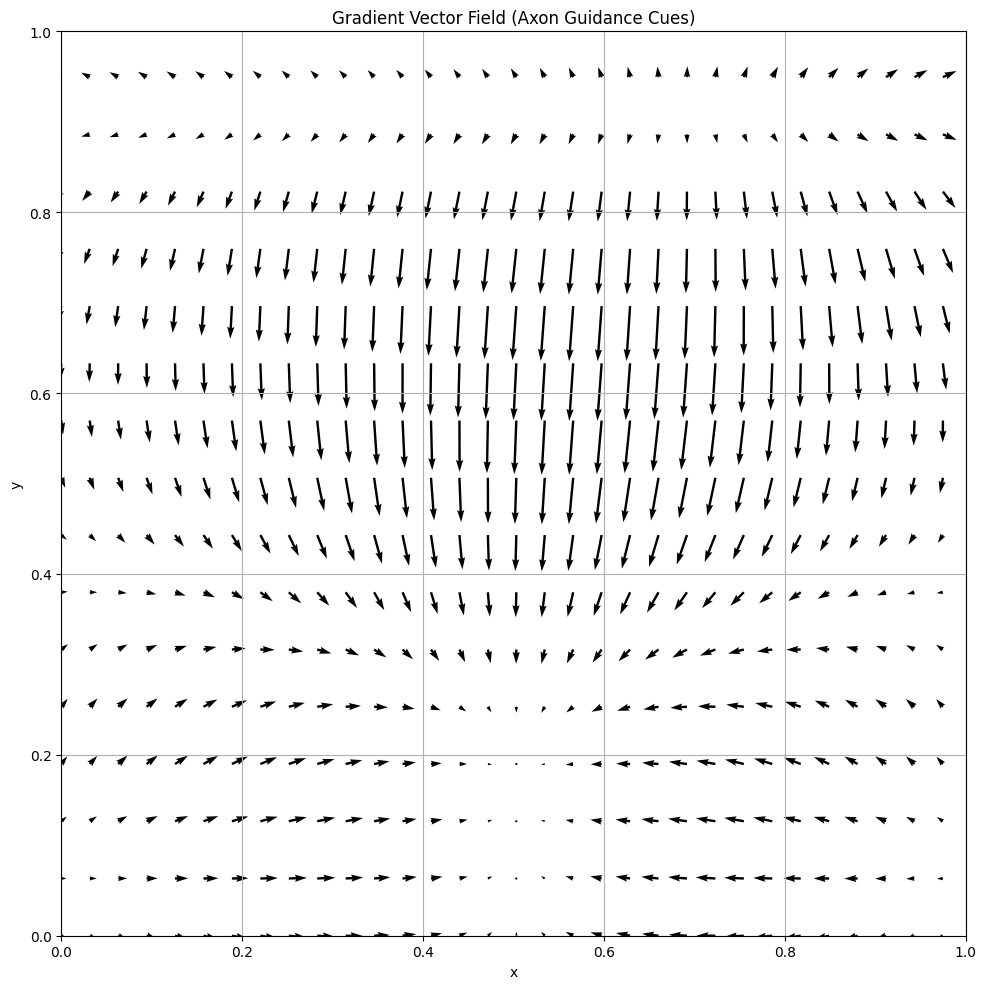

In [7]:
# --- Plot gradient as a vector field ---
plt.figure(figsize=(20, 10))
skip = (slice(None, None, 5), slice(None, None, 5))  # skip every 5th vector for clarity

plt.quiver(
    x[skip], y[skip], 
    -grad_x[skip], -grad_y[skip],  # Negative because neurons move *against* the gradient
    color='black', 
    angles='xy'
)
plt.title("Gradient Vector Field (Axon Guidance Cues)")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


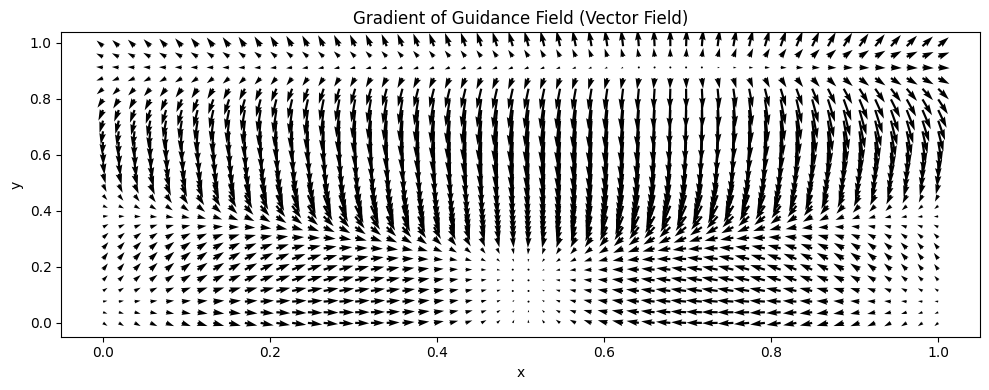

In [8]:
plt.figure(figsize=(10, 4))
skip = (slice(None, None, 3), slice(None, None, 3))  # downsample for clarity
plt.quiver(x[skip], y[skip], -grad_x[skip], -grad_y[skip], color='black', scale=30)
plt.title("Gradient of Guidance Field (Vector Field)")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()

plt.show()

# Move attractors down

In [ ]:
# Parameters
grid_width = 160   # number of x-steps
grid_height = 80   # number of y-steps
num_neurons = 50
num_amacrine_repellents = 100
num_muller_repellents = 100
num_attractors = 20

sigma_amacrine = 0.2
sigma_muller = 0.2
sigma_attractor = 0.8

amacrine_strength = 1.0
muller_strength = 1.0
attractor_strength = 15

#step_size = 1.0 / grid_size
step_size = 1.0 / max(grid_width, grid_height)
max_steps = 100

# Grid setup
x = np.linspace(0, 1, grid_width)
y = np.linspace(0, 1, grid_height)
x, y = np.meshgrid(x, y)

# --- Generate field components separately ---

# 1. Amacrine repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.1, 0.2)) 
    for _ in range(num_amacrine_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += amacrine_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_amacrine**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.8, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.15)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field
noisy_field = total_field # Remove noise temp

# --- Add random noise to the total field ---
#noise_amplitude = 0.1  # Adjust between 0.1 (subtle) to 1.0+ (very noisy)
#noise = noise_amplitude * np.random.randn(*total_field.shape)
#noisy_field = total_field + noise

# --- Compute gradient ---
#grad_y, grad_x = np.gradient(total_field)
grad_y, grad_x = np.gradient(noisy_field)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.3)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(20, 10))
plt.imshow(noisy_field, cmap='viridis', origin='lower', extent=[0, grid_width, 0, grid_height])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---

random_steps = 0
max_random_steps = 20  # or some other number

for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_height - 1))
        j = int(fpos[0] * (grid_width - 1))
        if i < 0 or i >= grid_height or j < 0 or j >= grid_width:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            random_steps += 1
            if random_steps > max_random_steps:
                break
            random_direction = np.random.randn(2)
            random_direction /= np.linalg.norm(random_direction)
            fpos += step_size * random_direction
        else:
            fpos -= step_size * direction / norm
            random_steps = 0  # reset when gradient is found

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_width, trajectory[:, 1] * grid_height, color=colors[idx], linewidth=2)

###END NOT STOPPING norm = 0
# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_width, ry * grid_height, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_width, ry * grid_height, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_width, ay * grid_height, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

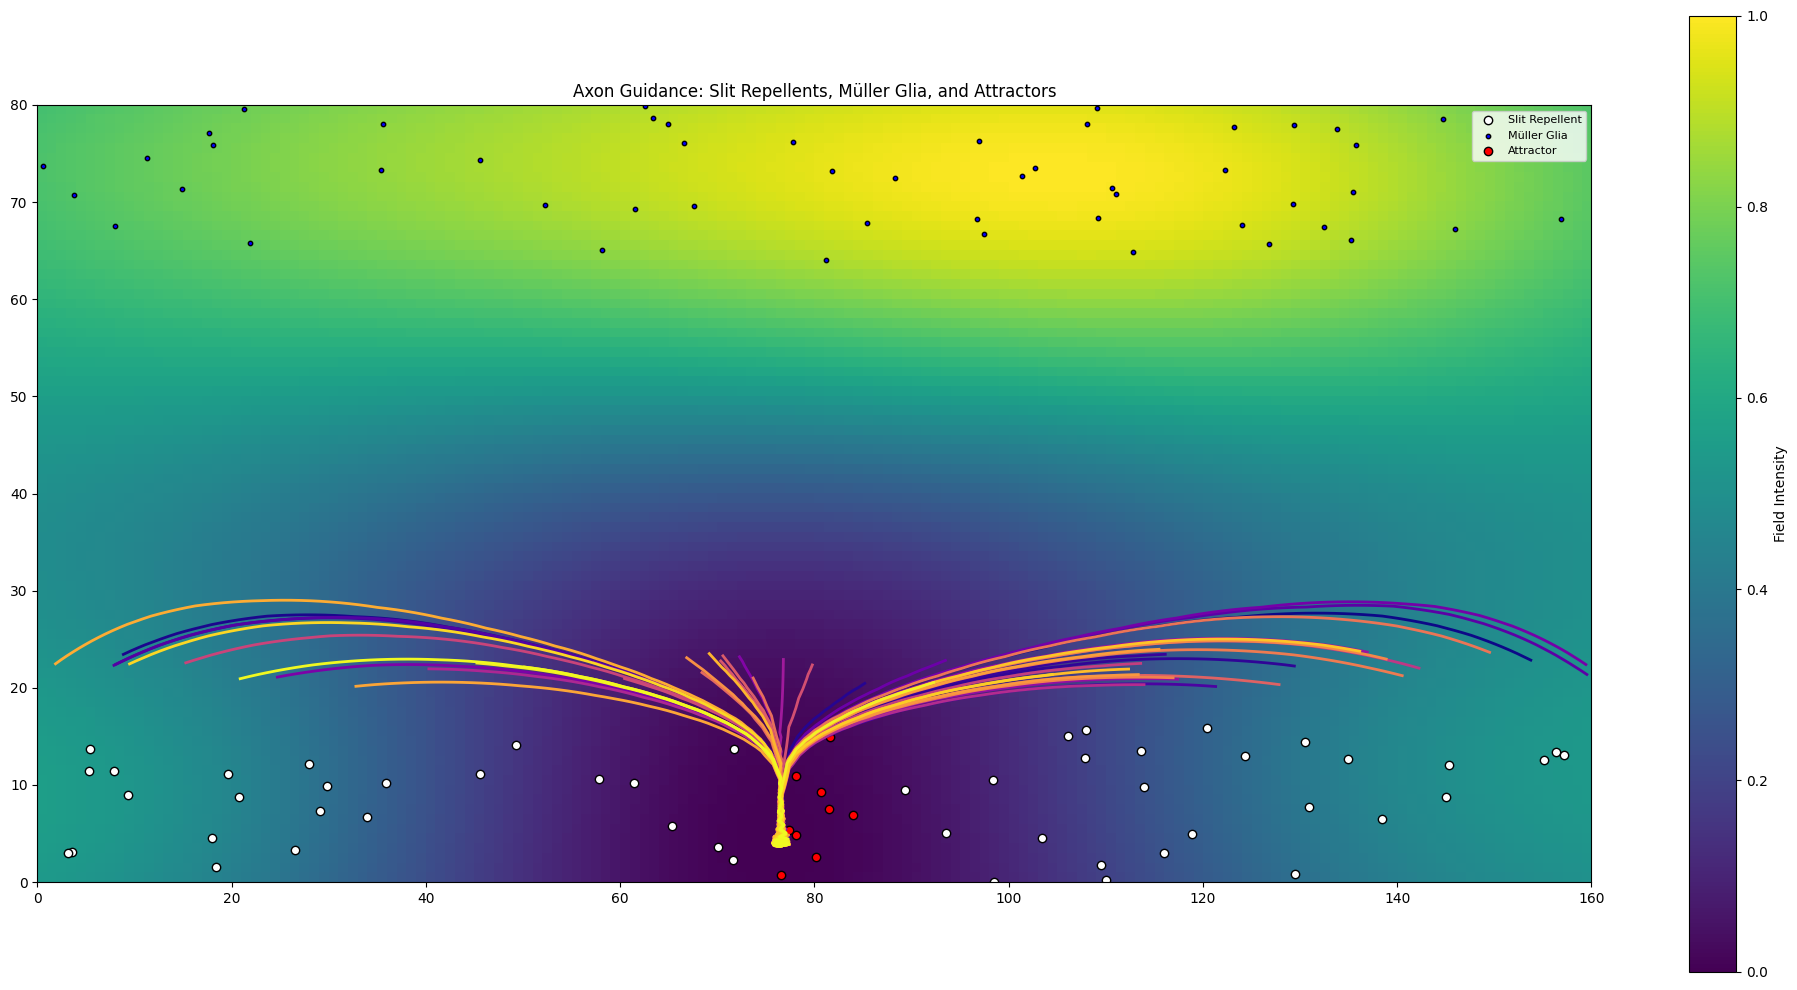

In [12]:
# REFACTOR

# Parameters
grid_width = 160   # number of x-steps
grid_height = 80   # number of y-steps
num_neurons = 50
num_amacrine_repellents = 50
num_muller_repellents = 50
num_attractors = 10

sigma_amacrine = 0.2
sigma_muller = 0.2
sigma_attractor = 0.3

amacrine_strength = 1.0
muller_strength = 1.0
attractor_strength = 5.0

#step_size = 1.0 / grid_size
step_size = 1.0 / max(grid_width, grid_height)
max_steps = 100

# Grid setup = plotting
x = np.linspace(0, 1, grid_width)
y = np.linspace(0, 1, grid_height)
x, y = np.meshgrid(x, y)

# --- Generate field components separately ---

# 1. Amacrine repellent field
repellent_positions = [
    (np.random.uniform(0.0, 0.45) if np.random.rand() < 0.5 else np.random.uniform(0.55, 1.0), 
     np.random.uniform(0.0, 0.2)) 
    for _ in range(num_amacrine_repellents)
]
repellent_field = np.zeros_like(x)
for rx, ry in repellent_positions:
    repellent_field += amacrine_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_amacrine**2))

# 2. Müller glia repellent field
repellent_positions_muller = [
    (np.random.uniform(0, 1), np.random.uniform(0.8, 1)) for _ in range(num_muller_repellents)
]
muller_field = np.zeros_like(x)
for rx, ry in repellent_positions_muller:
    muller_field += muller_strength * np.exp(-((x - rx)**2 + (y - ry)**2) / (2 * sigma_muller**2))

# 3. Attractor field (optic disc)
attractor_positions = [
    (np.random.uniform(0.475, 0.525), np.random.uniform(0.0, 0.2)) for _ in range(num_attractors)
]
attractor_field = np.zeros_like(x)
for ax, ay in attractor_positions:
    attractor_field -= attractor_strength * np.exp(-((x - ax)**2 + (y - ay)**2) / (2 * sigma_attractor**2))

# --- Combine all fields ---
total_field = repellent_field + muller_field + attractor_field

# --- Add random noise to the total field --- temp removed 
# noise_amplitude = 0.1  # Adjust between 0.1 (subtle) to 1.0+ (very noisy)
# noise = noise_amplitude * np.random.randn(*total_field.shape)
# noisy_field = total_field + noise

noisy_field = total_field

# --- Compute gradient ---
#grad_y, grad_x = np.gradient(total_field)
grad_y, grad_x = np.gradient(noisy_field)

# --- Neuron starting positions ---
starting_positions = [
    (np.random.uniform(0, 1), np.random.uniform(0.25, 0.3)) for _ in range(num_neurons)
]

# --- Plot setup ---
plt.figure(figsize=(20, 10))
plt.imshow(noisy_field, cmap='viridis', origin='lower', extent=[0, grid_width, 0, grid_height])
colors = plt.cm.plasma(np.linspace(0, 1, num_neurons))

# --- Simulate each neuron ---

random_steps = 0
max_random_steps = 10  # or some other number

for idx, start_pos in enumerate(starting_positions):
    fpos = np.array(start_pos, dtype=float)
    trajectory = []

    for _ in range(max_steps):
        trajectory.append(fpos.copy())
        i = int(fpos[1] * (grid_height - 1))
        j = int(fpos[0] * (grid_width - 1))
        if i < 0 or i >= grid_height or j < 0 or j >= grid_width:
            break
        direction = np.array([grad_x[i, j], grad_y[i, j]])
        norm = np.linalg.norm(direction)
        if norm == 0:
            random_steps += 1
            if random_steps > max_random_steps:
                break
            random_direction = np.random.randn(2)
            random_direction /= np.linalg.norm(random_direction)
            fpos += step_size * random_direction
        else:
            fpos -= step_size * direction / norm
            random_steps = 0  # reset when gradient is found

    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0] * grid_width, trajectory[:, 1] * grid_height, color=colors[idx], linewidth=2)

# --- Visual markers ---
for rx, ry in repellent_positions:
    plt.scatter(rx * grid_width, ry * grid_height, color='white', edgecolor='black', label='Slit Repellent' if rx == repellent_positions[0][0] else "")

for rx, ry in repellent_positions_muller:
    plt.scatter(rx * grid_width, ry * grid_height, color='blue', edgecolor='black', s=10, label='Müller Glia' if rx == repellent_positions_muller[0][0] else "")

for ax, ay in attractor_positions:
    plt.scatter(ax * grid_width, ay * grid_height, color='red', edgecolor='black', label='Attractor' if ax == attractor_positions[0][0] else "")

plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
plt.colorbar(label='Field Intensity')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


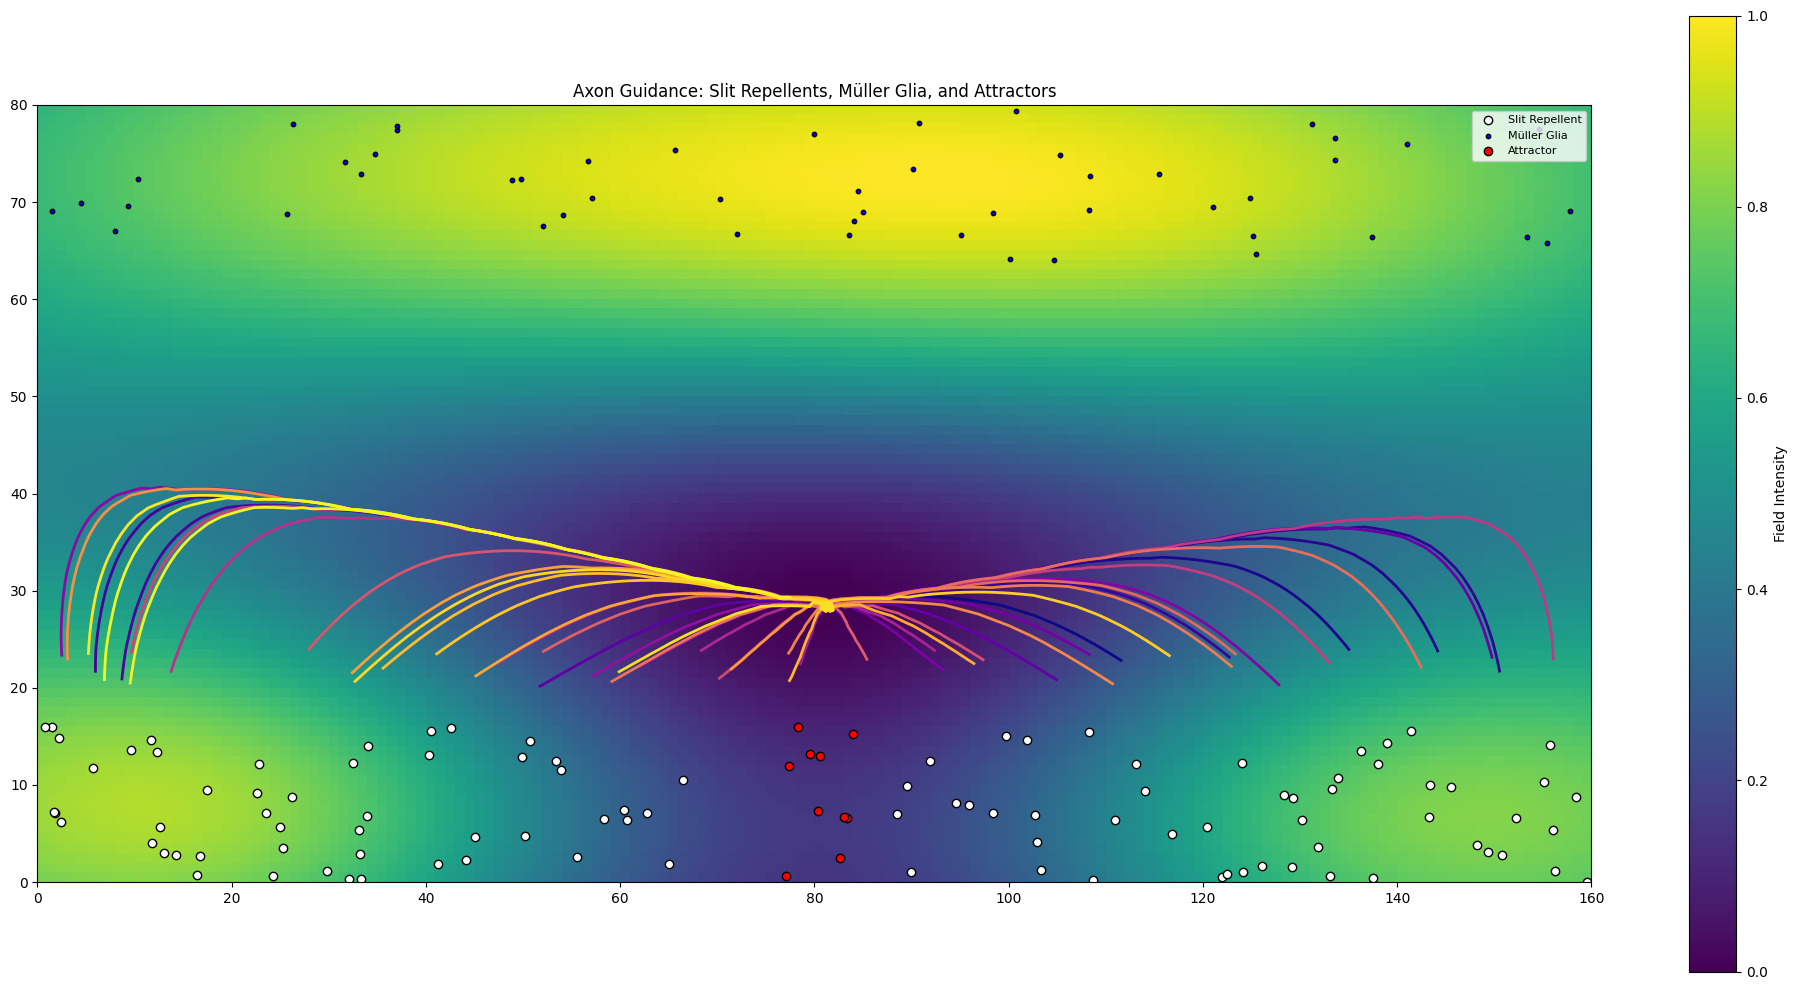

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
def get_parameters():
    return {
        'grid_width': 160,
        'grid_height': 80,
        'num_neurons': 50,
        'num_amacrine': 50,
        'num_muller': 50,
        'num_attractors': 10,
        'sigma_amacrine': 0.2,
        'sigma_muller': 0.2,
        'sigma_attractor': 0.3,
        'amacrine_strength': 1.0,
        'muller_strength': 1.0,
        'attractor_strength': 5.0,
        'max_steps': 100,
        'max_random_steps': 10
    }

# --- Grid Setup ---
def create_grid(grid_width, grid_height):
    x = np.linspace(0, 1, grid_width)
    y = np.linspace(0, 1, grid_height)
    return np.meshgrid(x, y)

# --- Field Generators ---
def generate_gaussian_field(positions, strength, sigma, x, y, invert=False):
    field = np.zeros_like(x)
    for px, py in positions:
        factor = -strength if invert else strength
        field += factor * np.exp(-((x - px)**2 + (y - py)**2) / (2 * sigma**2))
    return field

def generate_positions(n, x_range, y_range):
    return [(np.random.uniform(*x_range), np.random.uniform(*y_range)) for _ in range(n)]

# --- Neuron Simulation ---
def simulate_neurons(positions, grad_x, grad_y, step_size, max_steps, max_random_steps, grid_width, grid_height):
    trajectories = []
    for start_pos in positions:
        fpos = np.array(start_pos, dtype=float)
        trajectory = []
        random_steps = 0

        for _ in range(max_steps):
            trajectory.append(fpos.copy())
            i = int(fpos[1] * (grid_height - 1))
            j = int(fpos[0] * (grid_width - 1))
            if i < 0 or i >= grid_height or j < 0 or j >= grid_width:
                break

            direction = np.array([grad_x[i, j], grad_y[i, j]])
            norm = np.linalg.norm(direction)

            if norm == 0:
                random_steps += 1
                if random_steps > max_random_steps:
                    break
                direction = np.random.randn(2)
                direction /= np.linalg.norm(direction)
            else:
                direction = -direction / norm
                random_steps = 0

            fpos += step_size * direction

        trajectories.append(np.array(trajectory))
    return trajectories

# --- Plotting ---
def plot_field_and_trajectories(x, y, total_field, trajectories, amacrine_positions, muller_positions, attractor_positions, grid_width, grid_height):
    plt.figure(figsize=(20, 10))
    plt.imshow(total_field, cmap='viridis', origin='lower', extent=[0, grid_width, 0, grid_height])
    colors = plt.cm.plasma(np.linspace(0, 1, len(trajectories)))

    for idx, traj in enumerate(trajectories):
        plt.plot(traj[:, 0] * grid_width, traj[:, 1] * grid_height, color=colors[idx], linewidth=2)

    for rx, ry in amacrine_positions:
        plt.scatter(rx * grid_width, ry * grid_height, color='white', edgecolor='black', label='Slit Repellent' if (rx, ry) == amacrine_positions[0] else "")

    for rx, ry in muller_positions:
        plt.scatter(rx * grid_width, ry * grid_height, color='blue', edgecolor='black', s=10, label='Müller Glia' if (rx, ry) == muller_positions[0] else "")

    for ax, ay in attractor_positions:
        plt.scatter(ax * grid_width, ay * grid_height, color='red', edgecolor='black', label='Attractor' if (ax, ay) == attractor_positions[0] else "")

    plt.title("Axon Guidance: Slit Repellents, Müller Glia, and Attractors")
    plt.colorbar(label='Field Intensity')
    plt.legend(loc='upper right', fontsize=8)
    plt.tight_layout()
    plt.show()

# --- Main Workflow ---
def main():
    params = get_parameters()
    step_size = 1.0 / max(params['grid_width'], params['grid_height'])

    x, y = create_grid(params['grid_width'], params['grid_height'])

    amacrine_positions = generate_positions(params['num_amacrine'], (0.0, 0.45), (0.0, 0.2)) + \
                         generate_positions(params['num_amacrine'], (0.55, 1.0), (0.0, 0.2))
    muller_positions = generate_positions(params['num_muller'], (0, 1), (0.8, 1))
    attractor_positions = generate_positions(params['num_attractors'], (0.475, 0.525), (0.0, 0.2))

    amacrine_field = generate_gaussian_field(amacrine_positions, params['amacrine_strength'], params['sigma_amacrine'], x, y)
    muller_field = generate_gaussian_field(muller_positions, params['muller_strength'], params['sigma_muller'], x, y)
    attractor_field = generate_gaussian_field(attractor_positions, params['attractor_strength'], params['sigma_attractor'], x, y, invert=True)

    total_field = amacrine_field + muller_field + attractor_field
    grad_y, grad_x = np.gradient(total_field)

    neuron_positions = generate_positions(params['num_neurons'], (0, 1), (0.25, 0.3))
    trajectories = simulate_neurons(neuron_positions, grad_x, grad_y, step_size, params['max_steps'], params['max_random_steps'], params['grid_width'], params['grid_height'])

    plot_field_and_trajectories(x, y, total_field, trajectories, amacrine_positions, muller_positions, attractor_positions, params['grid_width'], params['grid_height'])

if __name__ == '__main__':
    main()


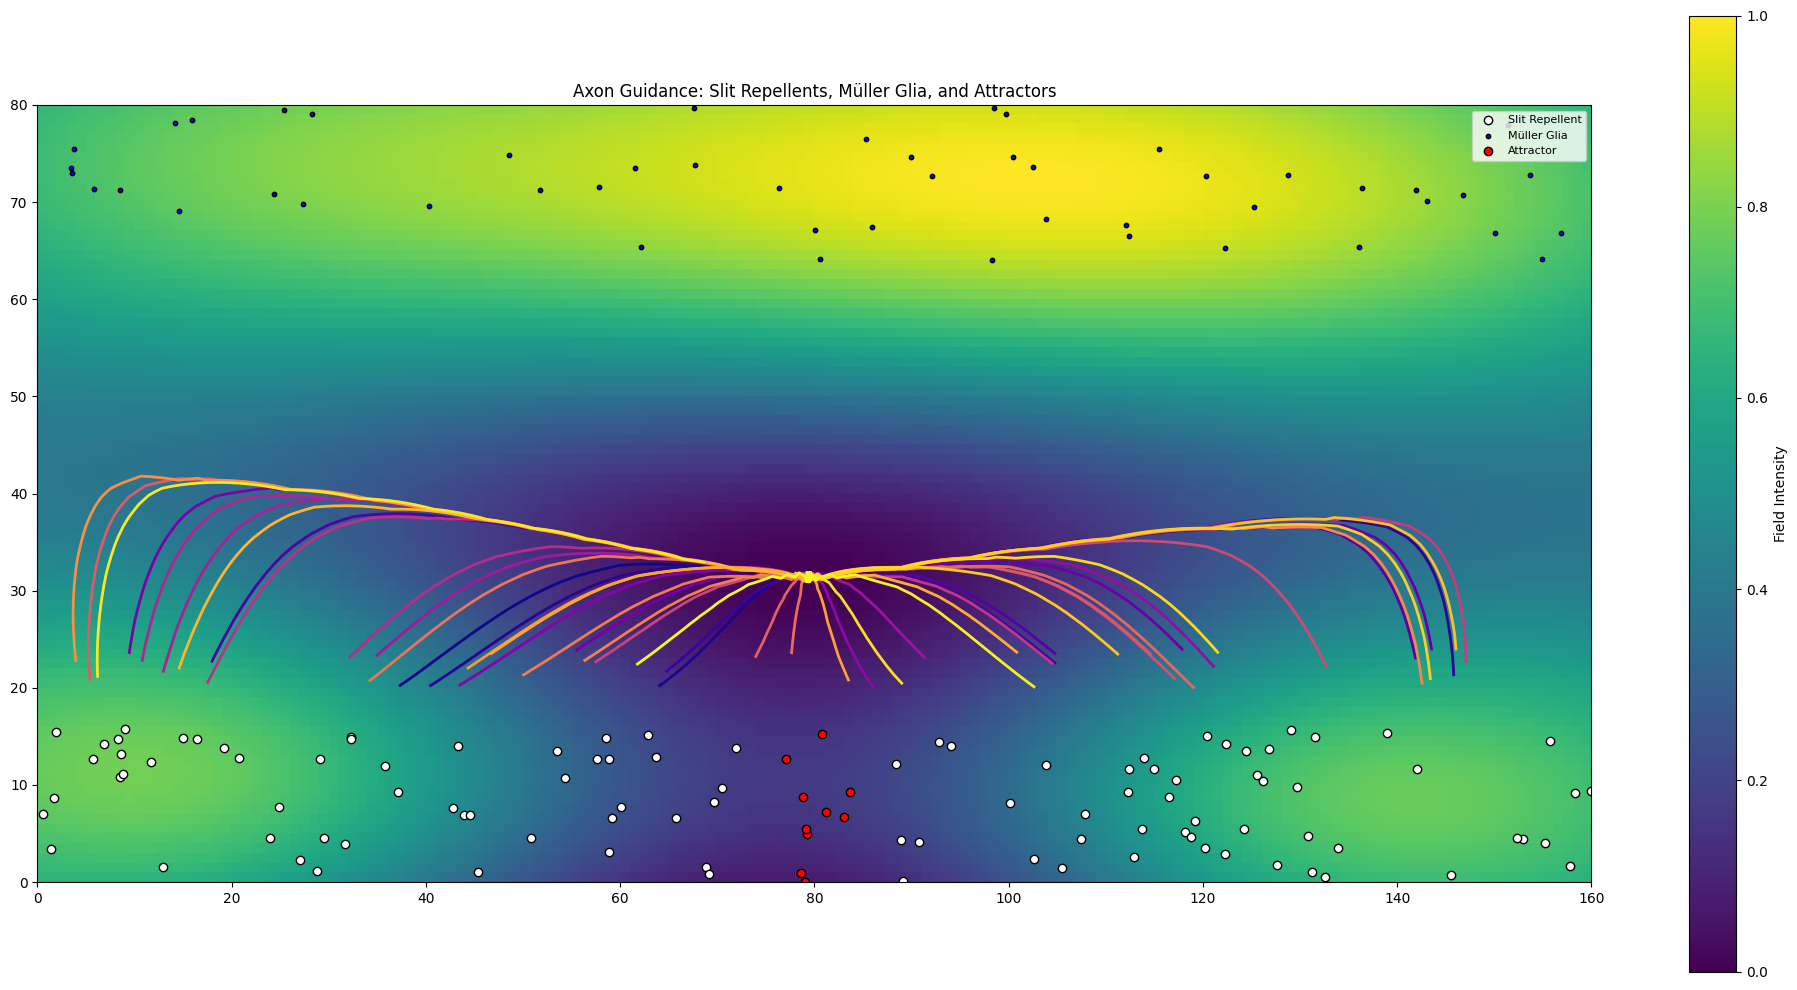

In [11]:
main()